In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from sklearn import metrics
import tabulate
import itertools
import umap
from importlib import reload
from scipy import stats
import matplotlib.image as mpimg
import goatools
from goatools.anno.gaf_reader import GafReader
import Bio.UniProt.GOA as GOA
import gget

# locals
import utils as ut
reload(ut)

2022-11-16 09:46:56.186395: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-16 09:46:56.300018: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib64:
2022-11-16 09:46:56.300043: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-16 09:46:56.326390: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-16 09:46:58.0894

<module 'utils' from '/home/cstansbu/git_repositories/spatial_transcriptomics/clustering/utils.py'>

In [2]:
choose = 50 # number of genes to consider

# load gene lists 
pandPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/panglaodb/pandb.tsv.gz"        
pandf = ut.read_panglaodb(pandPath)

controlList = [
    'Adipocytes',
    'B cells', 
    'Dendritic cells',
    'Macrophages',
    'Monocytes', 
    'NK cells',
    'T cells', 
]

allMarkers = pandf[pandf['cell type'].isin(controlList)]

mfList = []
for ctype in controlList:
    cf = allMarkers[allMarkers['cell type'] == ctype]
    cf = cf.sort_values(by='ubiquitousness index',
                        ascending=True)
    mfList.append(cf[['cell type', 'gene']].head(choose))


markerGenes = pd.concat(mfList, ignore_index=True)
print(pd.DataFrame(markerGenes['cell type'].value_counts()))
print()

                 cell type
Adipocytes              50
B cells                 50
Dendritic cells         50
Macrophages             50
Monocytes               50
NK cells                50
T cells                 50



In [3]:
# load cluster assignments
cdf = pd.read_csv("clusterAssignments.csv")
cid = {}

for key in cdf['key'].unique():
    t = cdf[cdf['key'] == key]
    cid[key] = t
    
print('done')

done


# Load saved data

In [4]:
dirPath = "/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/scanpy/"

adata = {}

for f in os.listdir(dirPath):
    
    if f.endswith('.h5ad'):
        key = f.split(".")[0]
        fullPath = f"{dirPath}{f}"
        data = sc.read(fullPath)
        adata[key] = data
    
print("done")

done


1 176
3 123
11 41
15 19


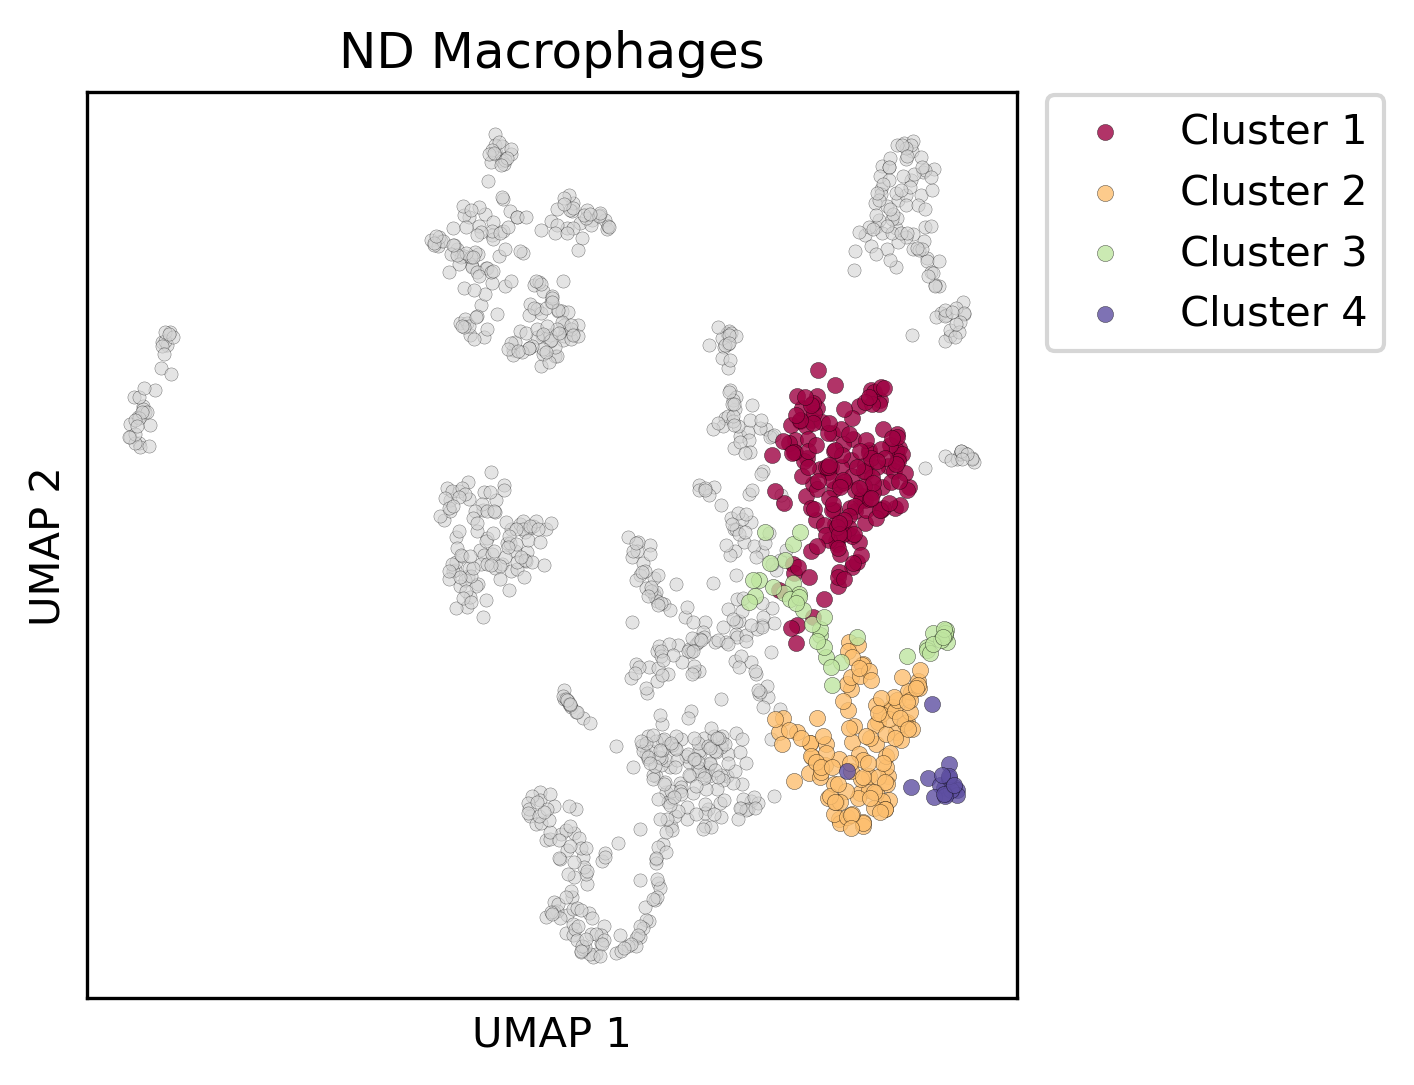

8 300
12 251
10 281
14 228
6 364
11 274
4 444
22 46


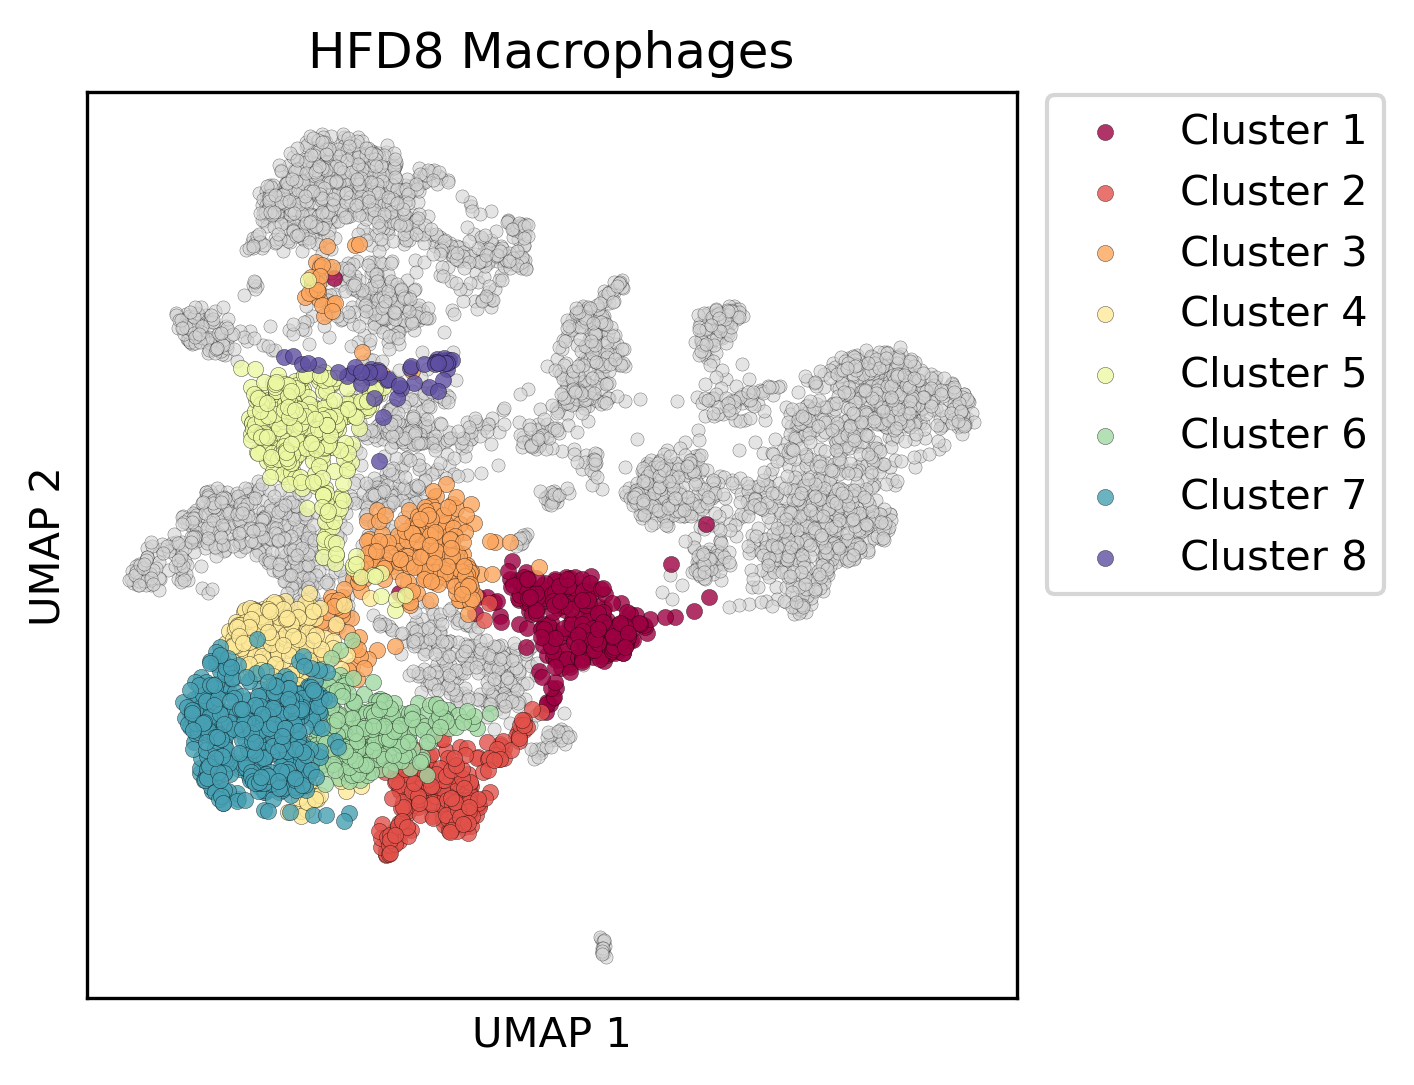

9 365
6 441
15 123
2 771
1 811
3 564
10 316
5 493


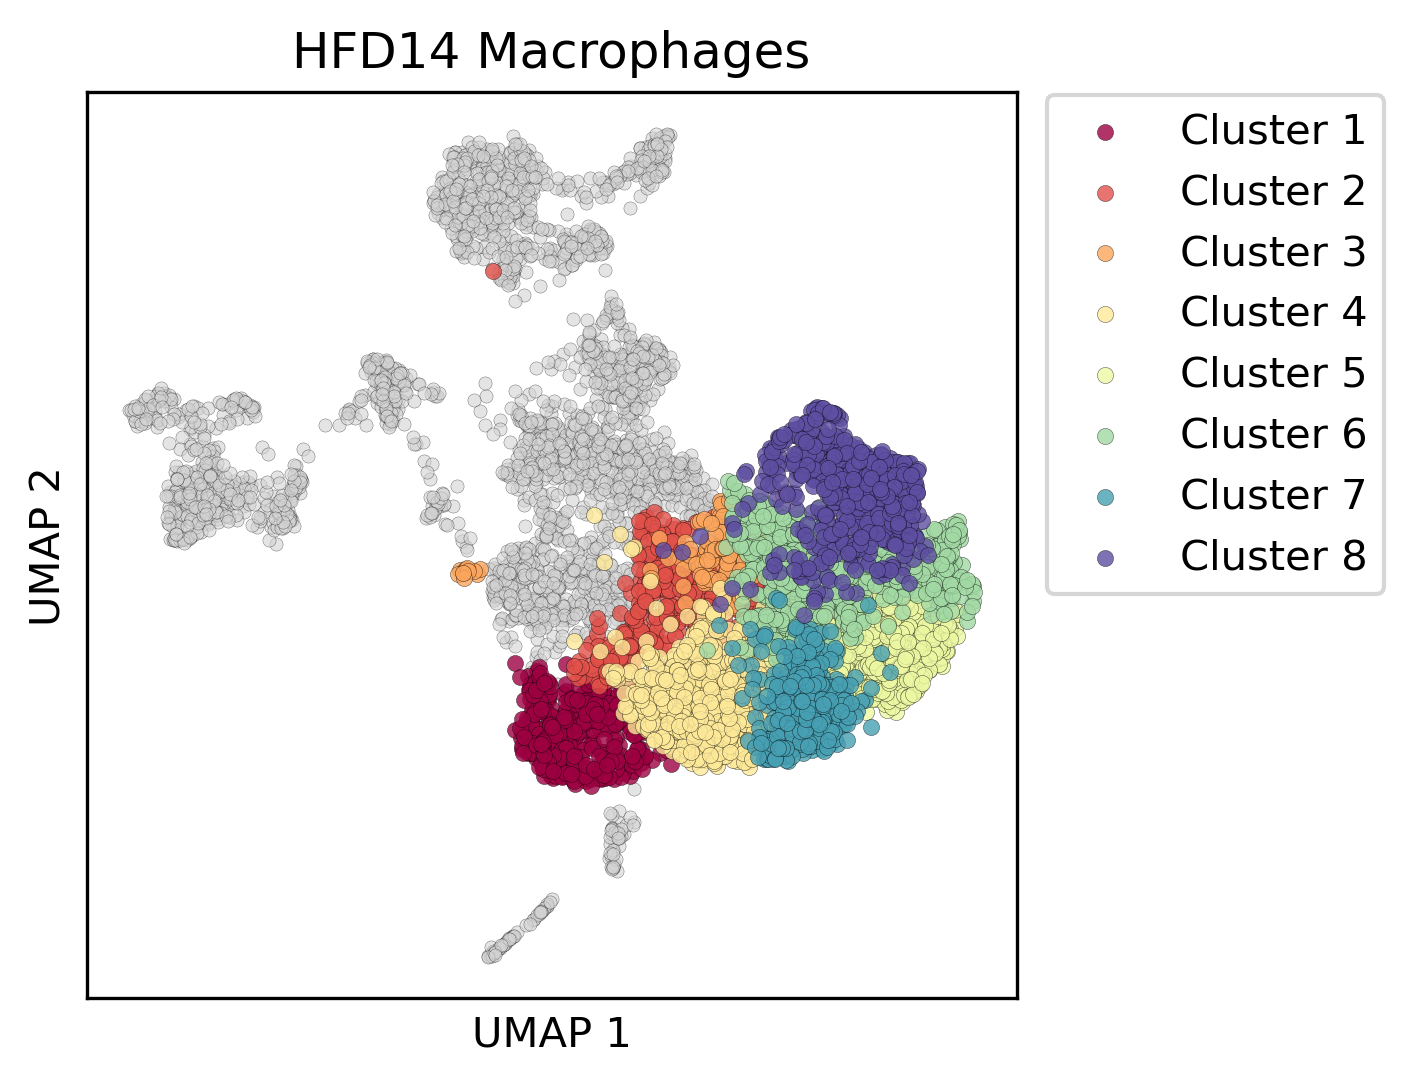

In [36]:
cellType = 'Macrophages'

plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 4
plt.rcParams['figure.facecolor'] = "w"

keys = ['ND', 'HFD8', 'HFD14']

for key in keys:
    data = adata[key]
    
    # get the run key
    allKeys = list(data.obs.keys() )
    allKeys.remove('n_genes')
    runKey = allKeys[0]
    
    clusterIds = data.obs[runKey].astype(int) + 1    
    
    # get all clusters for the cell type
    cellTypes = cid[key]
    cellTypeIds = cellTypes[cellTypes['cellType'] == cellType]['clusterId'].to_numpy()
    
    # get number of clusterss
    k = len(cellTypeIds)
    colorlist = ut.ncolor(k, cmap='Spectral')
    
    # get 2d coordinates
    embedding = data.obsm['X_umap']
    
    """
    PLOT background
    """
    cellInd = clusterIds.isin(cellTypeIds)

    plt.scatter(embedding[~cellInd, 0],
                embedding[~cellInd, 1],
                c='lightgrey',
                edgecolor="k",
                linewidth=0.1,
                s=10,
                alpha=0.6)
    
    for i, ctid in enumerate(cellTypeIds):
        cellInd = (clusterIds == ctid)
        
        print(ctid, i, cellInd.sum())
        
        label = f"Cluster {i+1}"
        # label = cellType
        
        
        plt.scatter(embedding[cellInd, 0],
                    embedding[cellInd, 1],
                    c=colorlist[i],
                    edgecolor="k",
                    linewidth=0.1,
                    s=15,
                    alpha=0.8,
                    label=label)
            
        # else:
        #     plt.scatter(embedding[cellInd, 0],
        #             embedding[cellInd, 1],
        #             # c=colorlist[ctid],
        #             c='r',
        #             edgecolor="k",
        #             linewidth=0.1,
        #             s=15,
        #             alpha=0.8)

    plt.title(f"{key} {cellType}")
    plt.xlabel("UMAP 1")
    plt.ylabel("UMAP 2")
    _ = plt.xticks([], [])
    _ = plt.yticks([], [])
    plt.legend(bbox_to_anchor=(1.01, 1.02))
    plt.show()
    

In [6]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
ctype = 'Monocytes'
runKey = "nn15_pca30_r0.75"
genes = ["Ly6c2", 'cx3cr1']
genes = [x.upper() for x in genes]
pltSize = 4


keys = ['ND', 'HFD8', 'HFD14']

res = []

for key in keys:
    data = adata[key]
    
    # get the run key
    allKeys = list(data.obs.keys() )
    allKeys.remove('n_genes')
    runKey = allKeys[0]
    
    clusterIds = data.obs[runKey].astype(int) + 1  # note that these are zero-indexed!
    df = data.to_df()
    
    # get all clusters for the cell type
    cellTypes = cid[key]
    
    # get 2d coordinates
    embedding = data.obsm['X_umap']
    
    cellTypeIds = cellTypes[cellTypes['cellType'] == ctype]['clusterId'].to_numpy()
        
    # set up th plot
    nPlots = len(genes) + 1

    plt.rcParams['figure.figsize'] = nPlots*pltSize, pltSize

    fig, axs = plt.subplots(1, nPlots, sharey=True, subplot_kw=dict(box_aspect=1))
    axs = axs.ravel()
    
    c = ['w'] * len(df)
    s = [10] * len(df)
    y_true = [0] * len(df)
    
    colorlist = ut.ncolor(len(cellTypeIds), cmap='Spectral')
    
    for i, ctid in enumerate(cellTypeIds):
        mask = (clusterIds == ctid)
        c = np.where(mask, colorlist[i], c)
        s = np.where(mask, 30, s)
        y_true = np.where(mask, 1, y_true)

    axs[0].scatter(embedding[: , 0], 
                   embedding[:, 1], 
                   c=c,
                   edgecolor="k",
                   s=s,
                   alpha=0.8)

    axs[0].set_title(f"{key} {ctype}")
    axs[0].set_xlabel("UMAP 1")
    axs[0].set_ylabel("UMAP 1")
        
    # plot the expression of each validation gene
    for i, g in enumerate(genes):
        plotNum = i + 1
        
        mask = df[g] > 0
        c = np.where(mask, "r", "w")
        s = np.where(mask, 30, 10)
        y_pred = np.where(mask, 1, 0)

        axs[plotNum].scatter(embedding[: , 0] , 
                             embedding[:, 1] , 
                             c=df[g],
                             cmap='Reds',
                             edgecolor="k",
                             s=s,
                             alpha=0.8)

        axs[plotNum].set_title(g)
        axs[plotNum].set_xlabel("UMAP 1")
        axs[plotNum].set_ylabel("UMAP 1")
        
        
        """Compute jaccard sim with the label """

        row = {
            'Key' : key,
            'cellType' : ctype,
            'Gene' : g,
            'jaccrd' : metrics.jaccard_score(y_true, y_pred),
            'accuracy' : metrics.accuracy_score(y_true, y_pred),
            'precision' : metrics.precision_score(y_true, y_pred),
        }

        res.append(row)
            
            
res = pd.DataFrame(res)
print('done')

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = 4, 3

sns.barplot(data=res,
            x='Gene',
            y='precision',
            edgecolor='k',
            hue='Key')

plt.legend(loc='upper right', bbox_to_anchor=(1.35, 1.028))
plt.xlabel('Gene')
plt.ylabel('Precision')
plt.title(ctype)

In [ ]:
# break

# GO Enrichment Analysis

In [ ]:
# cellType = 'Monocytes'
cellType = 'Monocytes'
keys = ['ND', 'HFD8', 'HFD14']
topNgenes = 300

resList = {}

output = f"/nfs/turbo/umms-indikar/shared/projects/spatial_transcriptomics/data/scanpy/{cellType}.xlsx"
with pd.ExcelWriter(output) as writer:  
    for key in keys:
        print(f"working {key}")
        data = adata[key]
        df = data.to_df()
        result = data.uns['rank_genes_groups']
        keys = data.uns['rank_genes_groups'].keys()
        groups = result['names'].dtype.names

        clusterIds = data.obs[runKey].astype(int)
        cellTypes = cid[key]

        # get all clusters for the cell type
        cellTypeIds = cellTypes[cellTypes['cellType'] == cellType]['clusterId'].to_numpy()

        for ctid in cellTypeIds:
            genes = list(result['names'][str(ctid-1)])
            
            genes = genes[:topNgenes] # need to filter the top n genes
            
            gf = pd.Series(genes, name=f'top_{topNgenes}_genes') 
            sheetName = f"{key}_c_{ctid}_genes"
            gf.to_excel(writer, sheet_name=sheetName, index=False)
            
            sheetName = f"{key}_c_{ctid}_kegg"
            kegg = gget.enrichr(genes, database="KEGG_2019_Mouse")
            kegg.to_excel(writer, sheet_name=sheetName, index=False)
            
            sheetName = f"{key}_c_{ctid}_wiki"
            wiki = gget.enrichr(genes, database="WikiPathways_2019_Mouse")
            wiki.to_excel(writer, sheet_name=sheetName, index=False)
            
            sheetName = f"{key}_c_{ctid}_GO"
            onto = gget.enrichr(genes, database="ontology")
            onto.to_excel(writer, sheet_name=sheetName, index=False)
        
    
print("done")